1. Temperatura media global desde hace 5 millones de años de 2015
1. Temperatura media global desde hace 1 millon de años de 2005
1. Temperatura media reconstruccion global desde hace 784 mil de años
1. Especies humanas con tamaño del cerebro
1. Merge de los tres datasheets de temperatura
1. Especies humanas con tamaño del cerebro vs tiempo
1. Extracción de datos NC lon-lat
1. Visualizar DNA (omitido)
1. Preparación DB (df_final_combinado) y rellenar NaN con knn

Clasificaciones:
1. Perceptron
1. MLP
1. SVC
1. KNN
1. RandomForest
1. Bayes
1. LogisticRegression
1. DecisionTree


In [1]:
from google.colab import drive
drive.mount('/content/drive')

ValueError: The domain policy has disabled Drive File Stream: https://support.google.com/a/answer/7496409

In [ ]:
#ruta David
#%cd /content/drive/Shared/fg23QZantrop/
%cd /content/drive/MyDrive/Pesq/Tfg3/Tfg23QZantrop/

/content/drive/MyDrive/Pesq/Tfg3/Tfg23QZantrop


In [ ]:
#ruta Qixiang
%cd /content/drive/MyDrive/Tfg23QZantrop

# IMPORTS


In [ ]:
import pandas as pd
import numpy as np
import xarray as xr
import geopandas as gpd
from matplotlib.animation import FuncAnimation
from shapely.geometry import Point

In [ ]:
from numpy import isnan
from sklearn.impute import KNNImputer
from imblearn.over_sampling import RandomOverSampler
import seaborn as sns
from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Perceptron
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

In [ ]:
pd.__version__

'2.0.3'

# **DATOS**

### **Temperatura media global desde hace 5 millones de años**

In [ ]:
df_5_million = pd.read_excel(io = "data/Global 5 Million Year Sea Level, Temperature, and d18Osw Reconstructions.xlsx")

 Column
 1. KYear	calendar Kyears before 2015
 1. d18Obenth	Modelled benthic d18O data,,,permille,,, closely representing the LR04 stack (Lisiecki and Raymo 2005),,N  
 1. d18Osw	Sea water d18O,permille VSMOW, the ice-volume contribution to benthic d18O (relative to present day),,N  
 1. d18Otemp	The d18O contribution of temperature ,permille VPDB, relative to present day,,N  
 1. sealev	Eustatic sea level - global average,meters, derived from ice-volume relative to present day
 1. Temp	Continental mean surface-air Temperature anomaly of the Northern Hemisphere (40-80N) relative to present day
 1. EuIS-sc	Total ice volume for the Eurasian Ice Sheet, meters sea level equivalent
 1. NaIS-sc	Total ice volume for the North American Ice Sheet,meters sea level equivalent
 1. AIS-sc	Total ice volume for the Antarctic Ice Sheet,meters sea level equivalent
 1. GrIS-sc	Total ice volume  for the Greenland Ice Sheet,meters sea level equivalent
 1. AnIS-V	Antarctic ice volume,10^6 km^2
 1. AnIS-ID	Antarctic ice discharge towards open water,Gigaton per year

 Missing Value: -999

In [ ]:
df_5_million.sample(5)

,KYear,d18Obenth,d18Osw,d18Otemp,Sealev,Temp,EuIS-sc,NaIS-sc,AIS-sc,GrIS-sc,AnIS-V,AnIS-ID
28934,-2406.6,0.215,0.006,0.209,-4.301,-5.816,-1.196,-2.021,-55.647,-7.456,26.1,-2750.1
16798,-3620.2,-0.004,-0.076,0.071,2.142,-0.545,-0.107,-0.163,-54.942,-4.625,25.4,-2329.7
30446,-2255.4,0.127,-0.035,0.162,-1.178,-3.599,-1.142,-2.404,-53.248,-6.384,24.6,-2327.1
35786,-1721.4,0.457,0.130,0.327,-20.423,-4.209,-10.545,-11.046,-52.888,-7.842,24.6,-2230.8
38304,-1469.6,0.376,0.003,0.374,-3.480,-8.951,-2.010,-2.775,-53.041,-7.706,25.0,-2732.0


In [ ]:
print(len(df_5_million['KYear'].unique()))

53001


In [ ]:
temperatura_media_2015 = 14.79
df_5_million['Temperatura_Ajustada'] = df_5_million['Temp'] + temperatura_media_2015

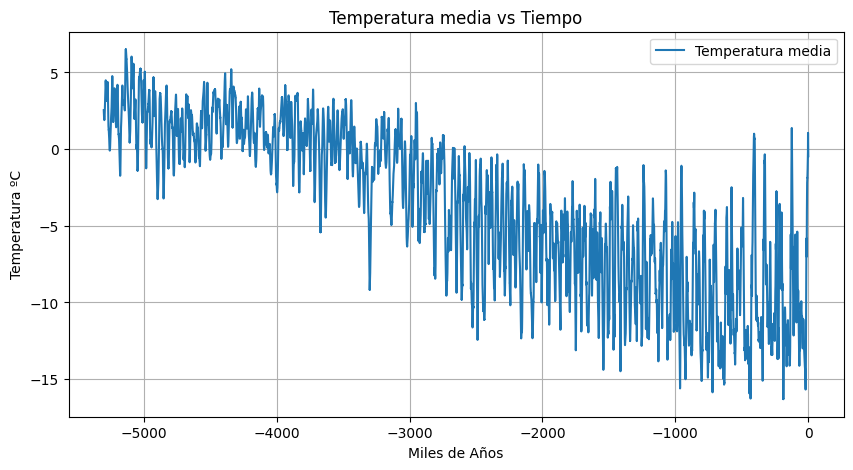

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(df_5_million['KYear'], df_5_million['Temp'], label='Temperatura media')
plt.xlabel('Miles de Años')
plt.ylabel('Temperatura ºC')
plt.title('Temperatura media vs Tiempo')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Calcular el promedio móvil (smooth average) usando una ventana de 1000
window_size = 1000
df_5_million['Temperatura_Suavizada'] = df_5_million['Temperatura_Ajustada'].rolling(window=window_size, min_periods=1, center=True).mean()


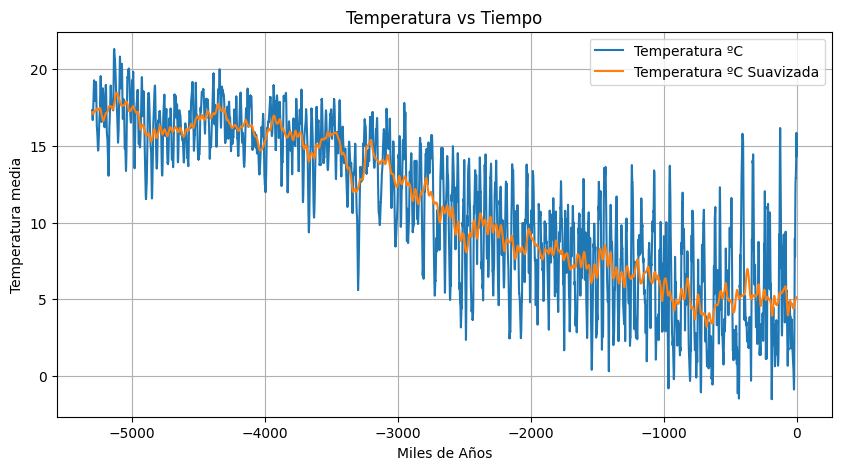

In [ ]:
# Crear el gráfico original, ajustado y suavizado
plt.figure(figsize=(10, 5))
plt.plot(df_5_million['KYear'], df_5_million['Temperatura_Ajustada'], label='Temperatura ºC')
plt.plot(df_5_million['KYear'], df_5_million['Temperatura_Suavizada'], label='Temperatura ºC Suavizada')
plt.xlabel('Miles de Años')
plt.ylabel('Temperatura media')
plt.title('Temperatura vs Tiempo')
plt.legend()
plt.grid(True)
plt.show()

### **Temperatura media global desde hace 1 millon de años**

In [ ]:
df_1_million = pd.read_excel(io = "data/Global 1Ma Temperature, Sea Level, and Ice Volume Reconstructions.xlsx")

Column
1. KYear (kyr BP) 2005
1. Atmospheric surface air temperature relative to present (degC)
1. Global sea level relative to present (m)
1. Eurasian ice volume relative to present (m sea level equivalent)
1. North American ice volume relative to present (m sea level equivalent)
1. Marine oxygen isotope value relative to present (o/oo)
1. Ice sheet contribution to the marine isotope signal, relative to present (o/oo)
1. Deep-sea temperature contribution to the marine isotope signal, relative to present (o/oo)
1. Mean isotope value of the Eurasian ice sheets (o/oo)
1. Mean isotope value of the North American ice sheets (o/oo)

Note: missing values in columns 9 and 10 represent periods with no significant continental ice. Please consult
the paper for further details concerning the various variables.

In [ ]:
df_1_million['KYear'] *= -1
df_1_million.sample(5)

,KYear,Temp,Sealev,Eas,Nam,Isotot,Iso_ice,Iso_oc,Iso_eas,Iso_nam
5208,-549.1,-12.2600,-88.2340,-39.1780,-37.72,1.2924,0.7066,0.5858,-29.5,-30.0
9516,-118.3,-5.6837,-2.1067,-0.1516,-1.8282,0.1561,0.0173,0.1388,-26.6,NaN
1659,-904.0,-11.0450,-54.3290,-28.8060,-18.512,0.9143,0.4206,0.4937,-29.0,-29.6
9535,-116.4,-8.0399,-5.8230,-1.0683,-4.4409,0.3190,0.0449,0.2741,-26.7,NaN
876,-982.3,-6.2068,-59.7780,-22.1710,-29.266,0.7983,0.4499,0.3484,-28.1,-28.7


In [ ]:
df_1_million.shape

(10700, 10)

In [ ]:
temperatura_media_2005 = 14.58
df_1_million['Temp_Ajustada'] = df_1_million['Temp'] + temperatura_media_2005

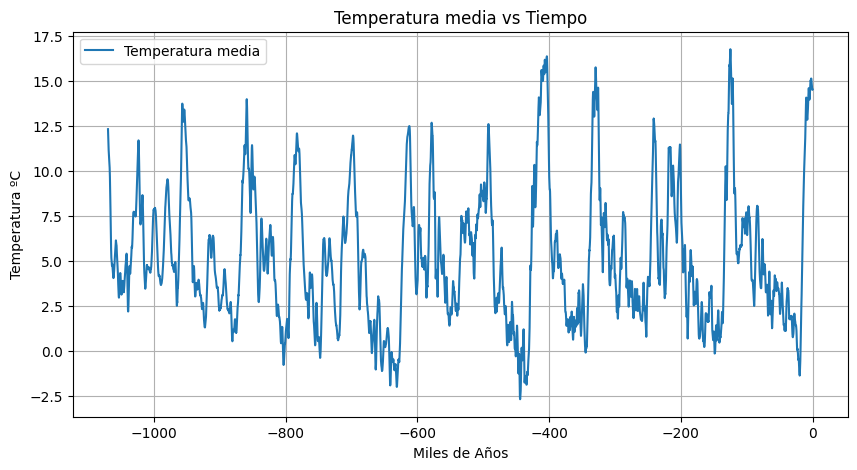

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(df_1_million['KYear'], df_1_million['Temp_Ajustada'], label='Temperatura media')
plt.xlabel('Miles de Años')
plt.ylabel('Temperatura ºC')
plt.title('Temperatura media vs Tiempo')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Calcular el promedio móvil (smooth average) usando una ventana de 500
window_size = 500
df_1_million['Temp_Suavizada'] = df_1_million['Temp_Ajustada'].rolling(window=window_size, min_periods=1, center=True).mean()

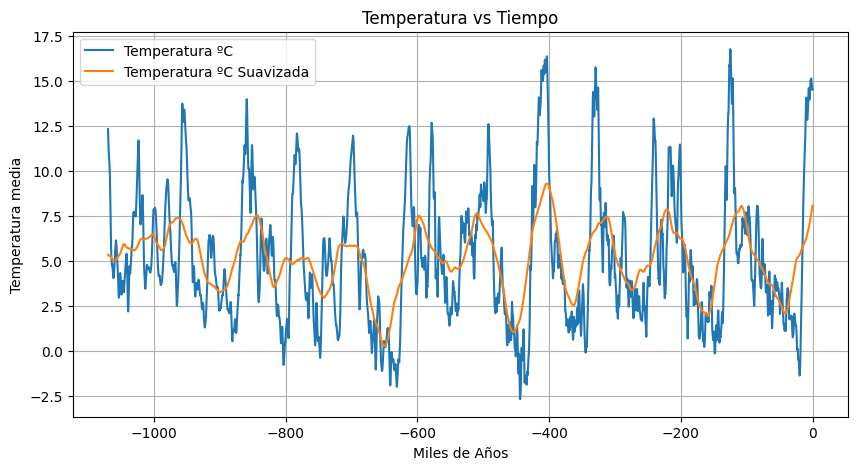

In [ ]:
# Crear el gráfico original, ajustado y suavizado
plt.figure(figsize=(10, 5))
plt.plot(df_1_million['KYear'], df_1_million['Temp_Ajustada'], label='Temperatura ºC')
plt.plot(df_1_million['KYear'], df_1_million['Temp_Suavizada'], label='Temperatura ºC Suavizada')
plt.xlabel('Miles de Años')
plt.ylabel('Temperatura media')
plt.title('Temperatura vs Tiempo')
plt.legend()
plt.grid(True)
plt.show()

### **Temperatura media reconstruccion global desde hace 784 mil de años**

In [ ]:
df_700_thousand = pd.read_excel(io = "data/Global 784,000 Year Proxy and Model Temperature Reconstructions.xlsx")

Column

1. KYear	age, calendar Kyears before present 2016
1. Temp	surface temperature anomaly, degrees C, Climate Modeling,modeled
1. tempanom-pxy	surface temperature anomaly, degrees C, Climate Reconstructions, proxy based

In [ ]:
df_700_thousand['KYear'] *= -1
df_700_thousand.sample(7)

,KYear,Temp,tempanom-pxy
382,-401,2.99,4.38
493,-290,0.82,0.48
82,-701,1.42,1.31
529,-254,-1.62,-0.76
504,-279,-1.34,-1.50
395,-388,1.46,1.05
499,-284,0.31,0.35


In [ ]:
df_700_thousand.shape

(784, 3)

In [ ]:
temperatura_media_2016 = 14.84
df_700_thousand['Temp_Ajustada'] = df_700_thousand['Temp'] + temperatura_media_2016

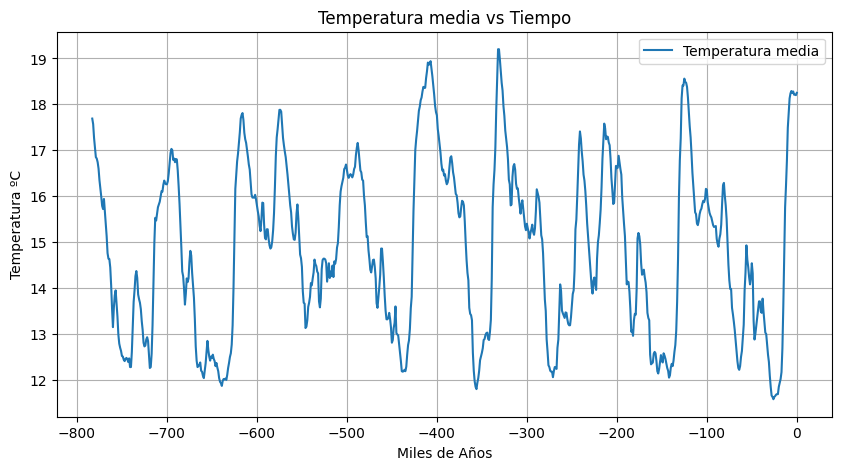

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(df_700_thousand['KYear'], df_700_thousand['Temp_Ajustada'], label='Temperatura media')
plt.xlabel('Miles de Años')
plt.ylabel('Temperatura ºC')
plt.title('Temperatura media vs Tiempo')
plt.legend()
plt.grid(True)
plt.show()

### **Especies humanas**

In [ ]:
df_especies = pd.read_excel(io = "data/Human_Species_lon_lat.xlsx")

In [ ]:
df_especies['Fecha_ini'] *= (-1)
df_especies['Fecha_fin'] *= (-1)
df_especies.sample(7)

,Especie,Fecha_ini,Fecha_fin,TamCerebroCM3,VarCerebro,lat,long,cultura,n_lascas
7,Paranthropus boisei,-2500,-1200,515,15.0,3.0500,35.3500,Olduvayense (Modo 1),7.0
1,Australopithecus anamensis,-4200,-3800,370,5.0,11.8277,41.0000,NaN,NaN
6,Australopithecus garhi,-2600,-2400,450,20.0,10.1500,40.5000,Olduvayense (Modo 1),4.0
5,Paranthropus aethiopicus,-2700,-2300,520,20.0,5.6000,35.9500,NaN,NaN
3,Kenyanthropus platyops,-3600,-3500,450,50.0,3.5833,36.1167,NaN,NaN
19,Denisovanos,-200,-30,1200,100.0,51.3967,84.6682,Musteriense (Modo 3),100.0
2,Australopithecus afarensis,-3850,-2950,415,35.0,9.0301,38.7408,Pre-Olduvayense (Modo 0),2.0


In [ ]:
df_especies.shape

(21, 9)

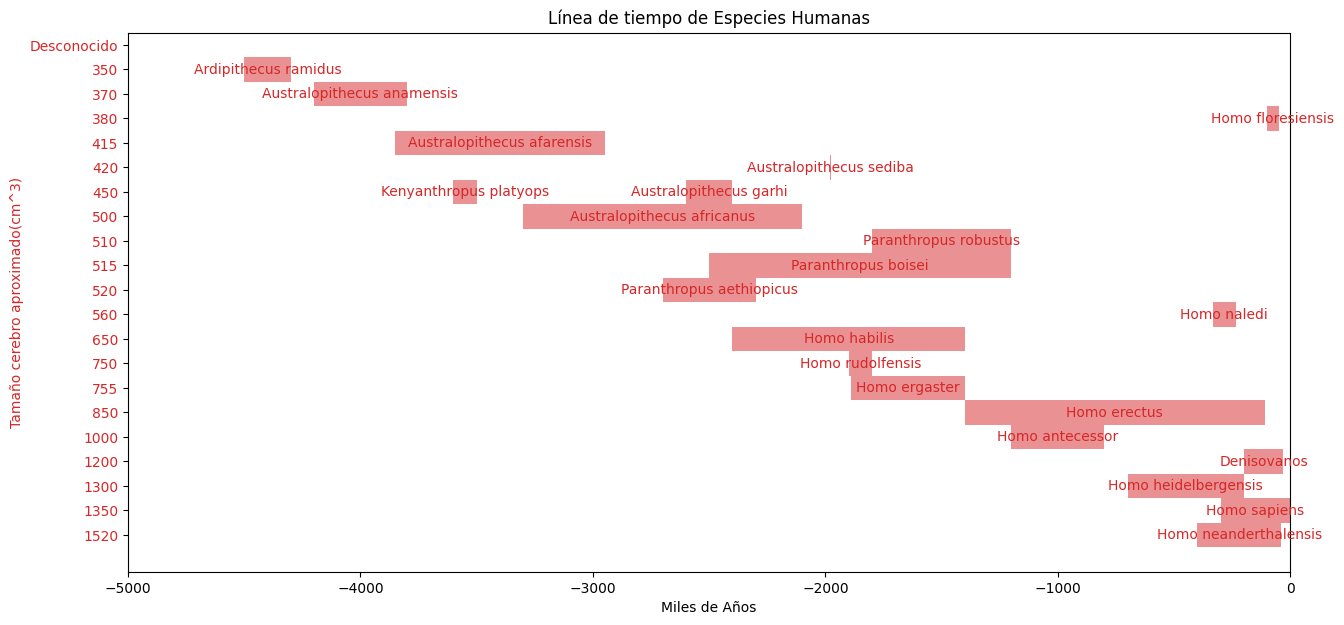

In [ ]:
# Crear la figura y el eje
fig, ax = plt.subplots(figsize=(15, 7))

# Ordenar eventos por tamaño de cerebro (descendente), y luego por fecha de inicio
df_conocidos = df_especies.dropna(subset=['TamCerebroCM3']).sort_values(by=['TamCerebroCM3', 'Fecha_ini'], ascending=[False, True])
df_desconocidos = df_especies[df_especies['TamCerebroCM3'].isna()].sort_values(by='Fecha_ini')

# Lista para guardar las posiciones verticales de las barras
positions = []
# Mapeo de tamaño de cerebro a posiciones en el eje y
cerebro_pos = {}
pos = 0

# Calcular la posición vertical para cada evento conocido, asignando posición basada en tamaño de cerebro
for i, evento in df_conocidos.iterrows():
    tamano_cerebro = evento['TamCerebroCM3']
    if tamano_cerebro not in cerebro_pos:
        cerebro_pos[tamano_cerebro] = pos
        pos += 1

# Asignar posición para desconocidos debajo de los conocidos
desconocido_pos = pos

# Agregar los eventos conocidos como barras horizontales en ax
for i, evento in df_conocidos.iterrows():
    start = evento['Fecha_ini']
    end = evento['Fecha_fin']
    tamano_cerebro = evento['TamCerebroCM3']
    y_pos = cerebro_pos[tamano_cerebro]
    ax.broken_barh([(start, end - start)], (y_pos, 1), facecolors=('tab:red'), alpha=0.5)
    ax.text((start + end) / 2, y_pos + 0.2, evento['Especie'], rotation=0, ha='center', va='bottom', color='tab:red', fontsize=10)

# Agregar los eventos desconocidos como barras horizontales en ax
for i, evento in df_desconocidos.iterrows():
    start = evento['Fecha_ini']
    end = evento['Fecha_fin']
    ax.broken_barh([(start, end - start)], (desconocido_pos, 1), facecolors=('tab:blue'), alpha=0.5)
    ax.text((start + end) / 2, desconocido_pos, evento['Especie'], rotation=0, ha='center', va='bottom', color='tab:blue', fontsize=10)

# Configurar las etiquetas y el eje Y
y_ticks = sorted(cerebro_pos.items(), key=lambda x: x[1])
y_labels = [item[0] for item in y_ticks] + ['Desconocido']
y_positions = [item[1] + 0.5 for item in y_ticks] + [desconocido_pos + 0.5]  # Centramos las etiquetas en las barras

ax.set_yticks(y_positions)
ax.set_yticklabels(y_labels)
ax.set_ylabel('Tamaño cerebro aproximado(cm^3)', color='tab:red')
ax.tick_params(axis='y', labelcolor='tab:red')
ax.set_xlabel('Miles de Años')
ax.set_xlim(-5000, 0)  # Ajustar el rango del eje x para mostrar los años de interés

plt.title('Línea de tiempo de Especies Humanas')
plt.show()


## **Merge temp 5M**

In [ ]:
df_5_million = pd.read_excel(io = "data/Global 5 Million Year Sea Level, Temperature, and d18Osw Reconstructions.xlsx")
df_1_million = pd.read_excel(io = "data/Global 1Ma Temperature, Sea Level, and Ice Volume Reconstructions.xlsx")
df_1_million['KYear'] *= -1
df_1_million['KYear'] -= 10
df_700_thousand = pd.read_excel(io = "data/Global 784,000 Year Proxy and Model Temperature Reconstructions.xlsx")
df_700_thousand['KYear'] *= -1
# Combinar los datos en un solo DataFrame
df_consolidado = pd.concat([df_5_million, df_1_million, df_700_thousand])
# Calcular la media de la temperatura por año
df_media_per_kyear = df_consolidado.groupby('KYear').agg({'Temp': 'mean', 'Sealev': 'mean'}).reset_index()

In [ ]:
# Guardar los datos consolidados en un nuevo archivo Excel
df_media_per_kyear.to_excel('data/media_temp_sealev.xlsx', index=False)

In [ ]:
df_media_per_kyear.shape

(53001, 3)

In [ ]:
df_media_per_kyear.sample(7)

,KYear,Temp,Sealev
762,-5223.8,3.0620,8.8360
48237,-476.3,-12.8395,-63.1165
19256,-3374.4,-2.6760,2.6570
42806,-1019.4,-8.7921,-38.0030
29362,-2363.8,-9.0490,-13.5450
26007,-2699.3,-5.1770,-11.2420
18482,-3451.8,0.1010,6.6030


In [ ]:
temperatura_media_2015 = 14.79
df_media_per_kyear['Temp_Ajustada'] = df_media_per_kyear['Temp'] + temperatura_media_2015

In [ ]:
# Calcular el promedio móvil (smooth average) usando una ventana
window_size = 1000
df_media_per_kyear['Temp_Suavizada'] = df_media_per_kyear['Temp_Ajustada'].rolling(window=window_size, min_periods=1, center=True).mean()

In [ ]:
df_media_per_kyear.sample(7)

,KYear,Temp,Sealev,Temp_Ajustada,Temp_Suavizada
52479,-52.1,-11.68550,-74.5200,3.10450,5.460759
17923,-3507.7,2.25000,7.9760,17.04000,15.681303
47464,-553.6,-12.32400,-72.0235,2.46600,5.929677
9142,-4385.8,4.73300,9.4370,19.52300,17.132652
30931,-2206.9,-7.26900,-7.7220,7.52100,8.589984
1200,-5180.0,-0.83100,8.5920,13.95900,17.365321
49605,-339.5,-3.54375,-45.3382,11.24625,5.491687


In [ ]:
# Guardar los datos consolidados en un nuevo archivo Excel
df_media_per_kyear.to_excel('data/media_temp_sealev.xlsx', index=False)

In [ ]:
df_media_per_kyear = pd.read_excel(io = "data/media_temp_sealev.xlsx")

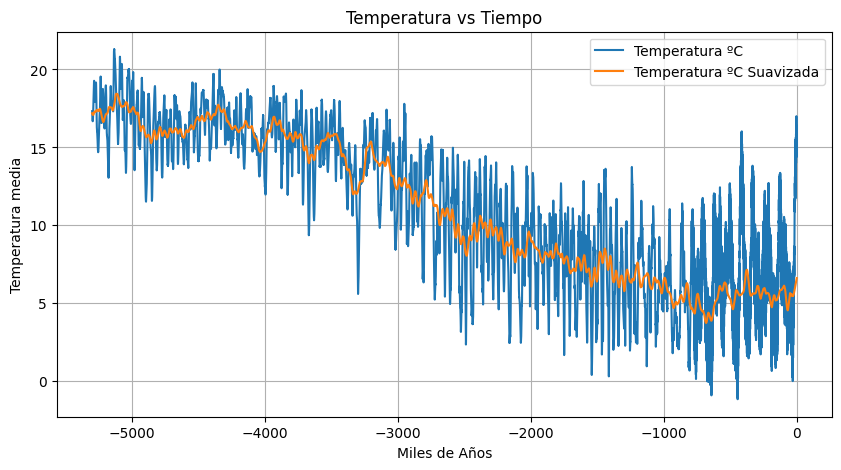

In [ ]:
# Crear el gráfico original, ajustado y suavizado
plt.figure(figsize=(10, 5))
plt.plot(df_media_per_kyear['KYear'], df_media_per_kyear['Temp_Ajustada'], label='Temperatura ºC')
plt.plot(df_media_per_kyear['KYear'], df_media_per_kyear['Temp_Suavizada'], label='Temperatura ºC Suavizada')
plt.xlabel('Miles de Años')
plt.ylabel('Temperatura media')
plt.title('Temperatura vs Tiempo')
plt.legend()
plt.grid(True)
plt.show()

### Plot 5M vs TamCerebro

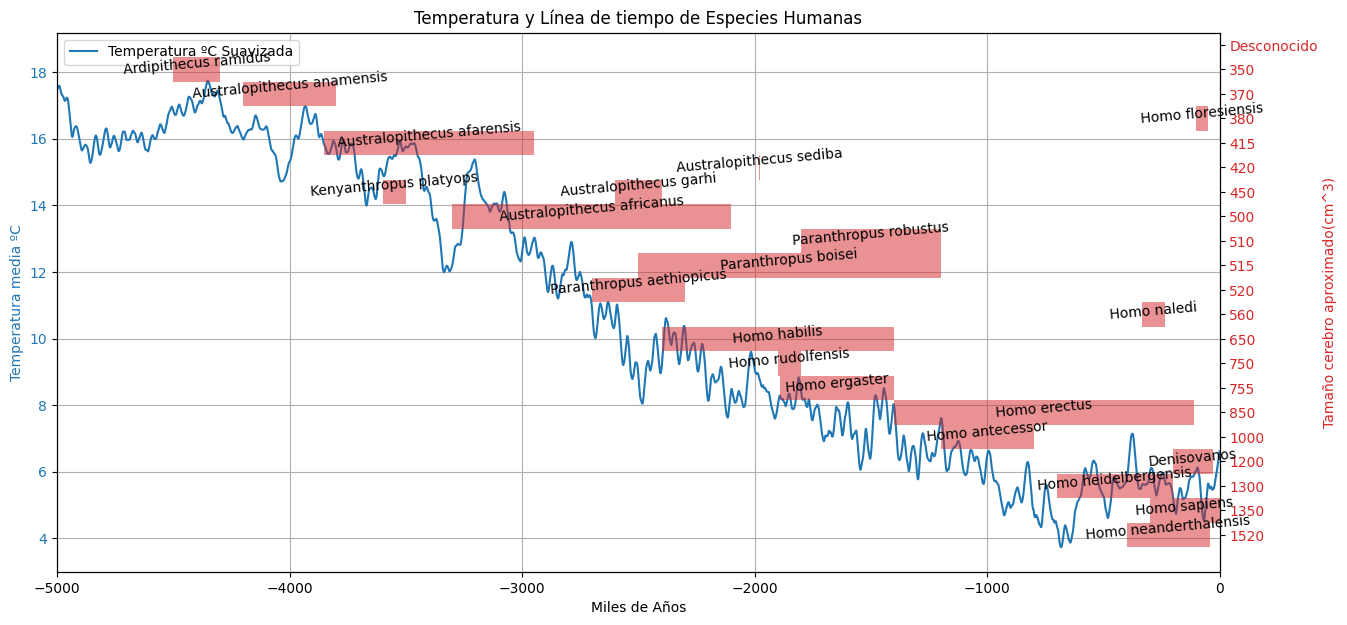

In [ ]:
# Crear la figura y el eje principal
fig, ax1 = plt.subplots(figsize=(15, 7))

# Gráfico de Temperatura
ax1.plot(df_media_per_kyear['KYear'], df_media_per_kyear['Temp_Suavizada'], color='tab:blue', label='Temperatura ºC Suavizada')
ax1.set_xlabel('Miles de Años')
ax1.set_ylabel('Temperatura media ºC', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.legend(loc='upper left')
ax1.grid(True)

# Crear un segundo eje para los eventos
ax2 = ax1.twinx()
ax2.set_yticks([])
ax2.set_ylabel('Tamaño cerebro aproximado(cm^3)', color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

# Ordenar eventos por tamaño de cerebro (descendente), y luego por fecha de inicio
df_conocidos = df_especies.dropna(subset=['TamCerebroCM3']).sort_values(by=['TamCerebroCM3', 'Fecha_ini'], ascending=[False, True])
df_desconocidos = df_especies[df_especies['TamCerebroCM3'].isna()].sort_values(by='Fecha_ini')

# Lista para guardar las posiciones verticales de las barras
positions = []
# Mapeo de tamaño de cerebro a posiciones en el eje y
cerebro_pos = {}
pos = 0

# Calcular la posición vertical para cada evento conocido, asignando posición basada en tamaño de cerebro
for i, evento in df_conocidos.iterrows():
    tamano_cerebro = evento['TamCerebroCM3']
    if tamano_cerebro not in cerebro_pos:
        cerebro_pos[tamano_cerebro] = pos
        pos += 1

# Asignar posición para desconocidos debajo de los conocidos
desconocido_pos = pos

# Agregar los eventos conocidos como barras horizontales en ax2
for i, evento in df_conocidos.iterrows():
    start = evento['Fecha_ini']
    end = evento['Fecha_fin']
    tamano_cerebro = evento['TamCerebroCM3']
    y_pos = cerebro_pos[tamano_cerebro]
    ax2.broken_barh([(start, end - start)], (y_pos, 1), facecolors=('tab:red'), alpha=0.5)
    ax2.text((start + end) / 2, y_pos + 0.2, evento['Especie'], rotation=5, ha='center', va='bottom', color='black', fontsize=10)

# Agregar los eventos desconocidos como barras horizontales en ax2
for i, evento in df_desconocidos.iterrows():
    start = evento['Fecha_ini']
    end = evento['Fecha_fin']
    ax2.broken_barh([(start, end - start)], (desconocido_pos, 1), facecolors=('tab:red'), alpha=0.5)
    ax2.text((start + end) / 2, desconocido_pos + 0.2, evento['Especie'], rotation=0, ha='center', va='bottom', color='black', fontsize=10)

# Configurar las etiquetas y el eje Y
y_ticks = sorted(cerebro_pos.items(), key=lambda x: x[1])
y_labels = [item[0] for item in y_ticks] + ['Desconocido']
y_positions = [item[1] + 0.5 for item in y_ticks] + [desconocido_pos + 0.5]  # Centramos las etiquetas en las barras

ax2.set_yticks(y_positions)
ax2.set_yticklabels(y_labels)
ax2.set_xlim(-5000, 0)  # Ajustar el rango del eje x para mostrar los años de interés

plt.title('Temperatura y Línea de tiempo de Especies Humanas')
plt.show()


## **Temperatura extraccion datos NC lon-lat**

In [ ]:
file_path = 'data/Temperatura/LGMR_SAT_climo.nc'
dataset = xr.open_dataset(file_path)
combined_df = pd.DataFrame()

for var_name in dataset.data_vars:
    variable_data = dataset[var_name]

    df_lon_lat = variable_data.to_dataframe().reset_index()

    if combined_df.empty:
        combined_df = df_lon_lat
    else:
      combined_df = pd.merge(combined_df, df_lon_lat, on=list(df_lon_lat.columns.intersection(combined_df.columns)), how='outer')

#combined_df['age'] *= (-1)
# Convertir longitudes de 0-360 a -180 a 180
combined_df['lon'] = combined_df['lon'].apply(lambda x: x - 360 if x > 180 else x)

combined_df.to_csv('data/output.csv', index=False)

In [ ]:
combined_df.shape

(1658880, 5)

In [ ]:
combined_df.sample(7)

,age,lat,lon,sat,sat_std
552367,7900.0,82.421051,-42.5,-22.364456,1.590287
594374,8500.0,90.000000,-145.0,-19.510525,2.698072
246907,3500.0,65.368423,-132.5,-8.639661,0.642382
833717,12100.0,-35.052631,-107.5,15.858478,0.348211
1584227,22900.0,18.000000,-152.5,19.907158,0.447385
701927,10100.0,50.210526,177.5,2.917093,0.687433
55531,900.0,-88.105263,-132.5,-46.226871,0.475250


<ipython-input-45-151f6cc3f738>:12: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


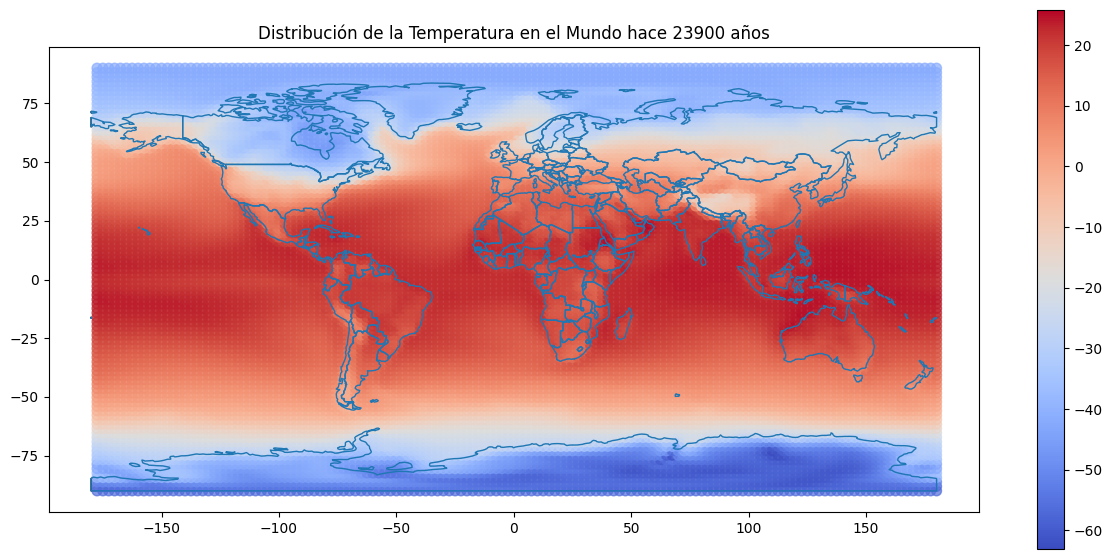

In [ ]:
df_geo = pd.read_csv('data/output.csv')

# Filtrar los datos para el año deseado
year = 23900
df_year = df_geo[df_geo['age'] == year]

# Crear una geometría de puntos a partir de la latitud y longitud
geometry = [Point(xy) for xy in zip(df_year['lon'], df_year['lat'])]
gdf = gpd.GeoDataFrame(df_year, geometry=geometry)

# Descargar el mapa mundial desde Natural Earth
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Crear el plot
fig, ax = plt.subplots(figsize=(15, 7))
world.boundary.plot(ax=ax, linewidth=1)
world.plot(ax=ax, color='lightgray', edgecolor='black')

# Plotea los puntos de datos
gdf.plot(ax=ax, markersize=50, column='sat', cmap='coolwarm', marker='o', alpha=0.7, legend=True)

# Agrega el título
plt.title(f'Distribución de la Temperatura en el Mundo hace {year} años')

# Muestra el plot
plt.show()

In [ ]:
# Crear intervalos de años
df_geo['age_group'] = pd.cut(df_geo['age'], bins=range(100, int(df_geo['age'].max()) + 5000, 5000))

# Descargar el mapa mundial desde Natural Earth
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Función para crear el plot para cada grupo de edad
def plot_age_group(age_group):
    df_group = df_geo[df_geo['age_group'] == age_group]
    if df_group.empty:
        return  # No plotear si el grupo está vacío

    # Crear una geometría de puntos a partir de la latitud y longitud
    geometry = [Point(xy) for xy in zip(df_group['lon'], df_group['lat'])]
    gdf = gpd.GeoDataFrame(df_group, geometry=geometry)

    # Crear el plot
    fig, ax = plt.subplots(figsize=(15, 7))
    world.boundary.plot(ax=ax, linewidth=1)
    world.plot(ax=ax, color='lightgray', edgecolor='black')

    # Plotea los puntos de datos
    gdf.plot(ax=ax, markersize=50, column='sat', cmap='coolwarm', marker='o', alpha=0.7, legend=True)

    # Agrega el título
    age_range = f"{age_group.left}-{age_group.right}"
    plt.title(f'Distribución de la Temperatura en el Mundo hace {age_range} años')

    # Muestra el plot
    plt.show()

# Crear plots para cada grupo de edad
age_groups = df_geo['age_group'].cat.categories
for age_group in age_groups:
    plot_age_group(age_group)


### **Visualizar DNA**

In [ ]:
#file_path = 'data/Humanos/predicciones de variantes alteradas en cuatro genomas de homínidos arcaicos/archaic_data_with_constraint_moderns_introgression_sQTLs.txt'
#df_dna = pd.read_csv(file_path, delimiter='\t', low_memory=False)

In [ ]:
#df_dna.shape

In [ ]:
#df_dna.sample(7)

#### Info de columnas

chrom = chromosome

pos = 1-based position per hg19/GRCh37

ref_allele = reference allele per hg19/GRCh37

alt_allele = alternate allele per hg19/GRCh37

ancestral_allele = the ancestral allele estimated from a mutli-species alignment from Ensembl

anc_dev = designates if the alternate allele is ancestral, derived, or unknown

variant_type = type of variant (indel or snv)

altai_gt = Altai Neanderthal genotype

chagyrskaya_gt = Chagyrskaya Neanderthal genotype

denisovan_gt = Denisovan genotype

vindija_gt = Vindija Neanderthal genotype

altai_gt_boolean = designates whether at least one alternate allele is present
in the Altai Neanderthal genotype

chagyrskaya_gt_boolean = designates whether at least one alternate allele is present in the Chagyrskaya Neanderthal genotype

denisovan_gt_boolean = designates whether at least one alternate allele is present in the Denisovan genotype

vindija_gt_boolean = designates whether at least one alternate allele is present in the Vindija Neanderthal genotype

distribution = designates which individual(s) have at least one alternate allele present

present_in_1KG = indicates whether or not the variant is present in 1KG

1KG_allele_count = the number of non-reference alleles present in 1KG

1KG_allele_number = the total number of alleles present in 1KG

1KG_allele_frequency = the variant's frequency in 1KG (1KG_allele_count/1KG_allele_number)

1KG_EAS_AF = allele frequency in the East Asian 1KG superpopulation from 1KG

1KG_EUR_AF = allele frequency in the European 1KG superpopulation from 1KG

1KG_AFR_AF = allele frequency in the African 1KG superpopulation from 1KG

1KG_AMR_AF = allele frequency in the American 1KG superpopulation from 1KG

1KG_SAS_AF = allele frequency in the South Asian 1KG superpopulation from 1KG

1KG_non_ASW_AFR_AF = allele frequency among the ESN, GWD, LWK, MSL, and YRI populations

present_in_gnomAD = indicates whether or not the variant is present in gnomAD

gnomAD_allele_count = the number of non-reference alleles present in gnomAD

gnomAD_allele_number = the total number of alleles present in gnomAD

gnomAD_allele_frequency = the variant's frequency in gnomAD (gnomAD_allele_count/gnomAD_allele_number)

Vernot_introgressed = designates whether the allele is a tag SNP from Vernot et al. 2016

Vernot_ancestral_allele = the ancestral allele from Vernot et al. 2016

Vernot_derived_allele = the derived allele from Vernot et al. 2016

Vernot_ancestral_derived_code = the ancestral/derived code (ancestral = 0, derived = 1) from Vernot et al. 2016

Vernot_AFA_AF = 1KG African ancestry allele frequency from Vernot et al. 2016

Vernot_AFR_AF = 1KG AFR superpopulation allele frequency from Vernot et al. 2016

Vernot_AMR_AF = 1KG AMR superpopulation allele frequency from Vernot et al. 2016

Vernot_EAS_AF = 1KG EAS superpopulation allele frequency from Vernot et al. 2016

Vernot_EUR_AF = 1KG EUR superpopulation allele frequency from Vernot et al. 2016

Vernot_PNG_AF = allele frequency among Melanesians from Vernot et al. 2016

Vernot_SAS_AF = 1KG SAS superpopulation allele frequency from Vernot et al. 2016

Vernot_Denisovan_base = the Denisovan nucleotide(s) from Vernot et al. 2016

Vernot_Neanderthal_base_1 = the first Neanderthal nucleotide from Vernot et al.
2016

Vernot_Neanderthal_base_2 = the second Neanderthal nucleotide from Vernot et al. 2016, if the variant has more than one allele

Vernot_haplotype_tag = haplotype tag from Vernot et al. 2016

Vernot_introgressed_AF = allele frequency for introgressed variants from Vernot et al. 2016, reported as the mean of the AFR, AMR, EAS, EUR, and SAS allele frequencies

Browning_introgressed = designates whether the allele was identified as introgressed from Browning et al. 2018

Browning_ref_alt = designated whether the reference (0) or alternate (1) allele is introgressed from Browning et al. 2018

Browning_introgressed_AF = allele frequency for variants present in 1KG (ancient and introgressed), the frequency for introgressed reference alleles is calculated as 1 - 1KG_allele_frequency, the frequency for introgressed alternate alleles is the 1KG_allele_frequency

annotation = gene annotation per GENCODE, Human Release 24

mis_oe = missense observed/expected value for the annotation from gnomAD

mis_z = missense z-score for the annotation from gnomAD

lof_oe = loss-of-function observed/expected value for the annotation from gnomAD

lof_z = loss-of-function z-score for the annotation from gnomAD

phyloP = variant phyloP score

ag_delta = acceptor gain probability from SpliceAI

al_delta = acceptor loss probability from SpliceAI

dg_delta = donor gain probability from SpliceAI

dl_delta = donor loss probability from SpliceAI

delta_max = maximum value from ag_delta, al_delta, dg_delta, and dl_delta

ag_pos = acceptor gain position in bp from SpliceAI

al_pos = acceptor loss position in bp from SpliceAI

dg_pos = donor gain position in bp from SpliceAI

dl_pos = donor loss position in bp from SpliceAI

Adipose_Subcutaneous = indicates whether (1) or not (0) the variant is an sQTL in GTEx for this tissue type

Adipose_Visceral_Omentum = indicates whether (1) or not (0) the variant is an sQTL in GTEx for this tissue type

Adrenal_Gland = indicates whether (1) or not (0) the variant is an sQTL in GTEx for this tissue type

Artery_Aorta = indicates whether (1) or not (0) the variant is an sQTL in GTEx for this tissue type

Artery_Coronary = indicates whether (1) or not (0) the variant is an sQTL in GTEx for this tissue type

Artery_Tibial = indicates whether (1) or not (0) the variant is an sQTL in GTEx for this tissue type

Brain_Amygdala = indicates whether (1) or not (0) the variant is an sQTL in GTEx for this tissue type

Brain_Anterior_cingulate_cortex_BA24 = indicates whether (1) or not (0) the variant is an sQTL in GTEx for this tissue type

Brain_Caudate_basal_ganglia = indicates whether (1) or not (0) the variant is an sQTL in GTEx for this tissue type

Brain_Cerebellar_Hemisphere = indicates whether (1) or not (0) the variant is an sQTL in GTEx for this tissue type

Brain_Cerebellum = indicates whether (1) or not (0) the variant is an sQTL in GTEx for this tissue type

Brain_Cortex = indicates whether (1) or not (0) the variant is an sQTL in GTEx for this tissue type

Brain_Frontal_Cortex_BA9 = indicates whether (1) or not (0) the variant is an sQTL in GTEx for this tissue type

Brain_Hippocampus = indicates whether (1) or not (0) the variant is an sQTL in GTEx for this tissue type

Brain_Hypothalamus = indicates whether (1) or not (0) the variant is an sQTL in GTEx for this tissue type

Brain_Nucleus_accumbens_basal_ganglia = indicates whether (1) or not (0) the variant is an sQTL in GTEx for this tissue type

Brain_Putamen_basal_ganglia = indicates whether (1) or not (0) the variant is an sQTL in GTEx for this tissue type

Brain_Spinal_cord_cervical_c-1 = indicates whether (1) or not (0) the variant is an sQTL in GTEx for this tissue type

Brain_Substantia_nigra = indicates whether (1) or not (0) the variant is an sQTL in GTEx for this tissue type

Breast_Mammary_Tissue = indicates whether (1) or not (0) the variant is an sQTL in GTEx for this tissue type

Cells_Cultured_fibroblasts = indicates whether (1) or not (0) the variant is an sQTL in GTEx for this tissue type

Cells_EBV-transformed_lymphocytes = indicates whether (1) or not (0) the variant is an sQTL in GTEx for this tissue type

Colon_Sigmoid = indicates whether (1) or not (0) the variant is an sQTL in GTEx for this tissue type

Colon_Transverse = indicates whether (1) or not (0) the variant is an sQTL in GTEx for this tissue type

Esophagus_Gastroesophageal_Junction = indicates whether (1) or not (0) the
variant is an sQTL in GTEx for this tissue type

Esophagus_Mucosa = indicates whether (1) or not (0) the variant is an sQTL in GTEx for this tissue type

Esophagus_Muscularis = indicates whether (1) or not (0) the variant is an sQTL in GTEx for this tissue type

Heart_Atrial_Appendage = indicates whether (1) or not (0) the variant is an sQTL in GTEx for this tissue type

Heart_Left_Ventricle = indicates whether (1) or not (0) the variant is an sQTL in GTEx for this tissue type

Kidney_Cortex = indicates whether (1) or not (0) the variant is an sQTL in GTEx for this tissue type

Liver = indicates whether (1) or not (0) the variant is an sQTL in GTEx for this tissue type

Lung = indicates whether (1) or not (0) the variant is an sQTL in GTEx for this tissue type

Minor_Salivary_Gland = indicates whether (1) or not (0) the variant is an sQTL in GTEx for this tissue type

Muscle_Skeletal = indicates whether (1) or not (0) the variant is an sQTL in GTEx for this tissue type

Nerve_Tibial = indicates whether (1) or not (0) the variant is an sQTL in GTEx for this tissue type

Ovary = indicates whether (1) or not (0) the variant is an sQTL in GTEx for this tissue type

Pancreas = indicates whether (1) or not (0) the variant is an sQTL in GTEx for this tissue type

Pituitary = indicates whether (1) or not (0) the variant is an sQTL in GTEx for this tissue type

Prostate = indicates whether (1) or not (0) the variant is an sQTL in GTEx for this tissue type

Skin_Not_Sun_Exposed_Suprapubic = indicates whether (1) or not (0) the variant is an sQTL in GTEx for this tissue type

Skin_Sun_Exposed_Lower_leg = indicates whether (1) or not (0) the variant is an sQTL in GTEx for this tissue type

Small_Intestine_Terminal_Ileum = indicates whether (1) or not (0) the variant is an sQTL in GTEx for this tissue type

Spleen = indicates whether (1) or not (0) the variant is an sQTL in GTEx for this tissue type

Stomach = indicates whether (1) or not (0) the variant is an sQTL in GTEx for this tissue type

Testis = indicates whether (1) or not (0) the variant is an sQTL in GTEx for this tissue type

Thyroid = indicates whether (1) or not (0) the variant is an sQTL in GTEx for this tissue type

Uterus = indicates whether (1) or not (0) the variant is an sQTL in GTEx for this tissue type

Vagina = indicates whether (1) or not (0) the variant is an sQTL in GTEx for this tissue type

Whole_Blood = indicates whether (1) or not (0) the variant is an sQTL in GTEx for this tissue type

N_GTEx_tissues = the number of tissues in which the variant is an sQTL in GTEx
sQTL = designates whether or not the variant is an sQTL in GTEx

Vernot_allele_origin = the variant's allele origin per Vernot et al. 2016

Browning_allele_origin = the variant's allele origin per Browning et al. 2018

# **Preparación db**

In [ ]:
df_5_million = pd.read_excel(io = "data/Global 5 Million Year Sea Level, Temperature, and d18Osw Reconstructions.xlsx")
df_especies = pd.read_excel(io = "data/Human_Species_lon_lat.xlsx")
df_especies['Fecha_ini'] *= (-1)
df_especies['Fecha_fin'] *= (-1)
df_media_per_kyear = pd.read_excel(io = "data/media_temp_sealev.xlsx")

In [ ]:
# Crear una lista para almacenar los datos expandidos
datos_expandidos = []

# Iterar sobre cada fila en el DataFrame de especies
for _, row in df_especies.iterrows():
    especie = row['Especie']
    inicio = row['Fecha_ini']
    fin = row['Fecha_fin']
    # Crear una fila para cada año en el rango de inicio a fin
    for año in np.arange(inicio, fin + 0.1, 0.1):
        datos_expandidos.append({'KYear': round(año, 1), 'Especie': especie})

# Convertir la lista a un DataFrame
df_expandidos = pd.DataFrame(datos_expandidos)
df_expandidos['KYear'] = df_expandidos['KYear'].astype(float)

In [ ]:
columns_to_add = df_5_million.columns.difference(df_media_per_kyear.columns)
df_final = pd.concat([df_media_per_kyear, df_5_million[columns_to_add]], axis=1)

In [ ]:
df_final.shape

(53001, 14)

In [ ]:
df_final.sample(7)

,KYear,Temp,Sealev,Temp_Ajustada,Temp_Suavizada,AIS-sc,AnIS-ID,AnIS-V,EuIS-sc,GrIS-sc,NaIS-sc,d18Obenth,d18Osw,d18Otemp
1791,-5120.9,4.0840,10.23400,18.8740,18.421934,-51.558,-1525.6,21.1,0.000,-0.192,0.000,-0.458,-0.207,-0.252
51735,-126.5,-4.4049,-5.20815,10.3851,5.799057,-56.117,-2682.0,26.1,-0.835,-7.774,-2.072,0.212,0.046,0.166
39255,-1374.5,-12.1150,-35.22400,2.6750,6.373169,-57.517,-3052.1,27.3,-15.450,-7.861,-16.734,0.954,0.265,0.689
24391,-2860.9,-0.7700,1.38300,14.0200,11.903320,-55.141,-2385.5,25.5,-0.170,-4.816,-0.468,0.016,-0.056,0.072
5154,-4784.6,1.4690,8.30300,16.2590,16.233557,-52.778,-2090.8,23.5,-0.036,-0.867,0.000,-0.249,-0.156,-0.093
17843,-3515.7,0.8980,7.13100,15.6880,15.668001,-52.607,-2166.6,23.6,-0.050,-2.113,-0.075,-0.169,-0.138,-0.031
3300,-4970.0,2.4660,8.36500,17.2560,17.186355,-52.812,-1994.2,23.4,0.000,-0.802,0.000,-0.299,-0.163,-0.135


In [ ]:
df_final = df_final.drop(columns=['Temp_Suavizada'])

In [ ]:
# Combinar los datos climáticos con los datos de especies expandidos
df_final_combinado = pd.merge(df_final, df_expandidos, on='KYear', how='left')

In [ ]:
db = pd.merge(df_final_combinado, df_especies, on='Especie', how='left')

In [ ]:
db = db.drop(columns=['Fecha_ini', 'Fecha_fin'])

In [ ]:
db.shape

(109609, 20)

In [ ]:
db.sample(5)

,KYear,Temp,Sealev,Temp_Ajustada,AIS-sc,AnIS-ID,AnIS-V,EuIS-sc,GrIS-sc,NaIS-sc,d18Obenth,d18Osw,d18Otemp,Especie,TamCerebroCM3,VarCerebro,lat,long,cultura,n_lascas
19518,-3498.4,1.748,8.0340,16.538,-52.957,-2086.0,23.7,-0.031,-0.888,-0.073,-0.274,-0.149,-0.125,Australopithecus afarensis,415.0,35.0,9.0301,38.7408,0.0,2.0
101582,-233.1,-11.818,-48.1995,2.972,-56.709,-3237.1,27.0,-5.203,-7.576,-7.160,0.668,0.109,0.559,Homo sapiens,1350.0,150.0,4.8000,35.9667,4.0,200.0
86291,-881.0,-11.901,-88.0285,2.889,-62.546,-2680.7,29.2,-22.745,-7.906,-42.138,1.289,0.614,0.675,Homo erectus,850.0,250.0,23.8833,106.6167,2.0,50.0
52299,-1985.4,-1.432,-11.9020,13.358,-57.412,-2411.4,26.6,-2.079,-7.785,-6.381,0.203,0.082,0.120,Homo habilis,650.0,150.0,2.9761,35.3542,1.0,10.0
1929,-5107.1,0.797,9.8140,15.587,-51.631,-1843.8,22.4,0.000,-0.578,0.000,-0.258,-0.184,-0.074,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
print(len(db['KYear'].unique()))

53001


In [ ]:
le = LabelEncoder()

In [ ]:
# Codificar la columna con LabelEncoder, ignorando NaN temporalmente
non_nan_mask_e = db['Especie'].notna()
db.loc[non_nan_mask_e, 'Especie'] = le.fit_transform(db.loc[non_nan_mask_e, 'Especie'])

In [ ]:
db.sample(7)

,KYear,Temp,Sealev,Temp_Ajustada,AIS-sc,AnIS-ID,AnIS-V,EuIS-sc,GrIS-sc,NaIS-sc,d18Obenth,d18Osw,d18Otemp,Especie,TamCerebroCM3,VarCerebro,lat,long,cultura,n_lascas
10126,-4287.4,1.655,8.5850,16.445,-52.639,-2087.3,23.5,0.000,-0.763,0.000,-0.234,-0.161,-0.074,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86136,-888.8,-12.722,-80.6505,2.068,-60.465,-2756.9,28.4,-21.015,-7.907,-37.346,1.173,0.530,0.643,6,1000.0,NaN,42.3556,3.5072,2.0,40.0
61105,-1720.1,-3.626,-18.7150,11.164,-53.563,-2239.9,24.8,-8.588,-7.840,-10.404,0.375,0.121,0.254,19,510.0,10.0,25.9700,27.7500,NaN,NaN
61384,-1713.1,-9.562,-15.3390,5.228,-55.383,-2999.5,26.3,-3.765,-7.764,-10.540,0.607,0.114,0.492,10,650.0,150.0,2.9761,35.3542,1.0,10.0
12195,-4080.5,1.106,8.3930,15.896,-52.647,-2118.0,23.5,0.000,-0.943,0.000,-0.214,-0.156,-0.058,3,370.0,5.0,11.8277,41.0000,NaN,NaN
24325,-3158.9,1.594,8.1400,16.384,-52.472,-1964.6,23.0,-0.084,-1.135,-0.137,-0.226,-0.150,-0.075,2,500.0,20.0,27.9786,24.6603,NaN,NaN
16144,-3735.7,2.410,8.2520,17.200,-52.801,-1808.4,23.1,-0.022,-0.880,-0.014,-0.293,-0.152,-0.141,1,415.0,35.0,9.0301,38.7408,0.0,2.0


 Column
 1. KYear	calendar Kyears before 2015
 1. d18Obenth	Modelled benthic d18O data,,,permille,,, closely representing the LR04 stack (Lisiecki and Raymo 2005),,N  
 1. d18Osw	Sea water d18O,permille VSMOW, the ice-volume contribution to benthic d18O (relative to present day),,N  
 1. d18Otemp	The d18O contribution of temperature ,permille VPDB, relative to present day,,N  
 1. sealev	Eustatic sea level - global average,meters, derived from ice-volume relative to present day
 1. Temp	Continental mean surface-air Temperature anomaly of the Northern Hemisphere (40-80N) relative to present day
 1. EuIS-sc	Total ice volume for the Eurasian Ice Sheet, meters sea level equivalent
 1. NaIS-sc	Total ice volume for the North American Ice Sheet,meters sea level equivalent
 1. AIS-sc	Total ice volume for the Antarctic Ice Sheet,meters sea level equivalent
 1. GrIS-sc	Total ice volume  for the Greenland Ice Sheet,meters sea level equivalent
 1. AnIS-V	Antarctic ice volume,10^6 km^2
 1. AnIS-ID	Antarctic ice discharge towards open water,Gigaton per year

Culturas:
 - Pre-Olduvayense (Modo 0)
 - Olduvayense (Modo 1)
 - Achelense (Modo 2)
 - Musteriense (Modo 3)
 - Auriñaciense (Modo 4)

In [ ]:
# Contar el número de NaN en el DataFrame
db.isnull().sum().sum()

0

### **Usamos KNN para reemplazar los valores NaN**

In [ ]:
# Aplicar KNNImputer
imputer  = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')
db_completo = imputer.fit_transform(db)

In [ ]:
db = pd.DataFrame(db_completo, columns = db.columns)

In [ ]:
print(sum(isnan(db.values)).flatten())

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [ ]:
db.sample(7)

,KYear,Temp,Sealev,Temp_Ajustada,AIS-sc,AnIS-ID,AnIS-V,EuIS-sc,GrIS-sc,NaIS-sc,d18Obenth,d18Osw,d18Otemp,Especie,TamCerebroCM3,VarCerebro,lat,long,cultura,n_lascas
28730,-2927.3,-4.21100,2.5250,10.57900,-53.702,-2352.9,24.9,-0.184,-4.866,-0.718,0.160,-0.074,0.234,2.0,500.0,20.0,27.9786,24.6603,0.0,2.0
91061,-592.6,-8.88360,-48.3755,5.90640,-57.110,-2970.7,27.0,-13.534,-7.939,-11.199,0.724,0.224,0.500,11.0,1300.0,50.0,49.3988,8.6724,2.0,40.0
16880,-3662.1,-1.69000,2.0370,13.10000,-54.593,-2385.4,25.3,-0.132,-4.926,-0.306,0.081,-0.077,0.158,1.0,415.0,35.0,9.0301,38.7408,0.0,2.0
62485,-1685.6,-4.29200,-18.6390,10.49800,-58.026,-2532.1,27.0,-3.871,-7.833,-10.834,0.441,0.153,0.288,19.0,510.0,10.0,25.9700,27.7500,1.0,7.0
91344,-578.4,-5.96765,-25.9595,8.82235,-57.729,-2529.7,26.8,-1.393,-8.043,-12.261,0.368,0.156,0.212,7.0,850.0,250.0,23.8833,106.6167,2.0,50.0
50065,-2097.1,-4.16900,-5.1880,10.62100,-54.093,-2428.0,25.2,-2.320,-7.540,-3.203,0.227,0.009,0.218,10.0,650.0,150.0,2.9761,35.3542,1.0,10.0
95076,-394.6,-9.75085,-31.6300,5.03915,-55.655,-3039.3,26.4,-5.864,-5.630,-3.247,0.523,0.039,0.485,13.0,1520.0,100.0,51.2277,6.7735,3.0,100.0


In [ ]:
# Guardar db en CSV
db.to_csv('data/db.csv', index=False)

In [ ]:
db.shape

(109609, 20)

### Definir la columna target

In [ ]:
# Leer db guardado
db = pd.read_csv('data/db.csv')

In [ ]:
# Definir la columna target
target = 'TamCerebroCM3'

In [ ]:
# Crear DataFrame con las características (features)
X = db.drop(columns=[target])
# Crear Serie con el target
y = db[target]

## **Split**

In [ ]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size = 0.2)

In [ ]:
y_train.head(5)

12650     370.0
72652     650.0
5252      350.0
33723     500.0
102495    850.0
Name: TamCerebroCM3, dtype: float64

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((87687, 19), (21922, 19), (87687,), (21922,))

## **Estandarizamos los datos**

In [ ]:
# StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_test.mean()

In [ ]:
# MinMaxScaler
#scaler = MinMaxScaler()
#X_train_scaled = scaler.fit_transform(X_train)
#X_test_scaled = scaler.transform(X_test)
#X_test_scaled.mean()

# **Perceptron**

In [ ]:
i = 20000

In [ ]:
p = Perceptron(max_iter=i)
p.fit(X_train, y_train)
pred_test = p.predict(X_test)
pred_train = p.predict(X_train)

In [ ]:
print(accuracy_score(pred_test, y_test))
print(accuracy_score(pred_train, y_train))

0.9934312562722379
0.9925872706330471


# **MLP**

In [ ]:
lr='adaptive'
mi= 1000
hl1 = 512
hl2 = 128
act = 'relu'
vb=False

In [ ]:
#sknet = MLPClassifier(hidden_layer_sizes=(hl1), activation=act, learning_rate=lr, max_iter=mi, verbose=vb)
sknet = MLPClassifier()

sknet.fit(X_train, y_train)
preds_test = sknet.predict(X_test)
preds_train = sknet.predict(X_train)
accuracy_test = accuracy_score(y_test, preds_test)
accuracy_train = accuracy_score(y_train, preds_train)

In [ ]:
print("Accuracy_test: {:.4f}".format(accuracy_test))
print("Precision_test: {:.4f}".format(precision_score(y_test, preds_test, average='weighted', zero_division=0)))
print("F1_score: {:.4f}".format(f1_score(y_test, preds_test, average='weighted', zero_division=0)))
print("Recall_score: {:.4f}".format(recall_score(y_test, preds_test, average='weighted', zero_division=0)))
print("Accuracy_train: {:.4f}".format(accuracy_train))

Accuracy_test: 0.9998
Precision_test: 0.9996
F1_score: 0.9997
Recall_score: 0.9998
Accuracy_train: 0.9997


In [ ]:
plt.figure()
plt.plot(xnh, str, label="Conjunto train", c='green')
plt.plot(xnh, ste, label="Conjunto test", c='red')
plt.xlabel("neuronas hl2")
plt.ylabel("Score")
plt.title("neuronas hidden neurons 2")
plt.legend()
plt.xscale('log')
plt.grid(True)
plt.show()

## **Probamos Varios numeros de capas y numero de neuronas por capa**

In [ ]:
layers = []
for hl1 in [1,2,4,8,16,64,128,256,384,512,1000,2000]:
  layers.append([hl1])
  for hl2 in [1,4,16,64,256,1024]:
    if hl2 < hl1:
      i = 0
      #
      layers.append([hl1,hl2])
'''
for hl1 in [1,2,4,8,16,32,64,128,256,512]:
  for hl2 in [1,2,4,8,16,32,64,128,256,512]:
    for hl3 in [1,2,4,8,16,32,64,128,256,512]:
      if hl3 < hl1 and hl3 < hl2 and hl2 < hl1:
        layers.append([hl1,hl2,hl3])
'''

functions = ['logistic'] #['tanh']

In [ ]:
# Probamos la red para diferentes tamañs y numero de capas y las diferentes funciones de activacion
results = []
for f in functions:
  for l in layers:
    sknet = MLPClassifier(hidden_layer_sizes=l, activation=f, learning_rate=lr, max_iter=mi, verbose=vb)

    sknet.fit(x_train, y_train)
    preds_test = sknet.predict(x_test)
    preds_train = sknet.predict(x_train)

    acc_test = accuracy_score(preds_test, y_test)
    acc_train = accuracy_score(preds_train, y_train)
    print(l,f,acc_test,acc_train)
    if len(l) == 1:
      results.append([l[0],0,f,acc_test,acc_train])
    else:
      results.append([l[0],l[1],f,acc_test,acc_train])

In [ ]:
res = pd.DataFrame(results, columns = ['capa1','capa2','funcion','acc_test','acc_train'])
res = res.sort_values(['acc_test','acc_train'],ascending=False)


In [ ]:
res.to_excel("data/ResultadosMLP1capa.xlsx",index = False, header = True)

In [ ]:
res.head(20)

,capa1,capa2,funcion,acc_test,acc_train
4,64,0,tanh,0.941935,0.948522
6,256,0,tanh,0.936738,0.943056
5,128,0,tanh,0.935663,0.947088
3,16,0,tanh,0.895341,0.901434
2,8,0,tanh,0.855735,0.854256
1,4,0,tanh,0.775090,0.785394
0,1,0,tanh,0.732079,0.746192
7,384,0,tanh,0.714516,0.725672
8,512,0,tanh,0.709319,0.717697


## **Gráficas**

In [ ]:
res = pd.read_excel(io = "data/ResultadosMLP1capa.xlsx", sheet_name="Sheet1")

In [ ]:
res.head(20)

,capa1,capa2,funcion,acc_test,acc_train
0,256,0,tanh,0.938710,0.952554
1,1024,0,tanh,0.938530,0.952106
2,640,0,tanh,0.937276,0.951523
3,1664,0,tanh,0.937097,0.950269
4,1792,0,tanh,0.936738,0.951927
5,512,0,tanh,0.935125,0.952599
6,64,0,tanh,0.935125,0.947939
7,384,0,tanh,0.934946,0.949776
8,128,0,tanh,0.934229,0.952016
9,1536,0,tanh,0.932079,0.943548


In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True
fig = plt.figure()
ax = Axes3D(fig)
x = [2,  , ]
y = [1, 6, 8, 1, 3]
z = [3, 4, 10, 3, 1]
ax.scatter3D(x, y, z, c=z, alpha=1, marker='d', s=150)
plt.show()

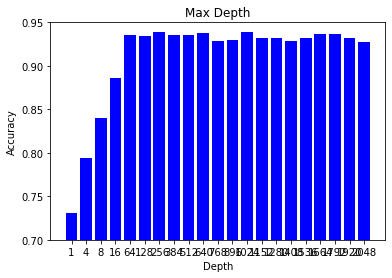

In [ ]:
mono = res[res.capa2 == 0]
mono = mono[['capa1','acc_test']].sort_values('capa1')

c = mono[['capa1']].values
a = mono[['acc_test']].values

x = []
y = []

for i in range(len(c)):
  x.append(str(c[i][0]))
  y.append(a[i][0])

plt.bar(x,y,color = 'blue')
plt.title('Max Depth')
plt.xlabel('Depth')
plt.ylabel('Accuracy')

plt.ylim(ymin=0.7,ymax=0.95)

plt.show()

# **SVC**

In [ ]:
svc = SVC()
svc.fit(X_train, y_train)
svc_preds = svc.predict(X_test)

print("SVC Accuracy: {:.4f}".format(accuracy_score(y_test, svc_preds)))
print("SVC Classification Report:")
print(classification_report(y_test, svc_preds, zero_division=0))

# **KNeighbors**

In [ ]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_preds = knn.predict(X_test)

print("KNN Accuracy: {:.4f}".format(accuracy_score(y_test, knn_preds)))
print("KNN Classification Report:")
print(classification_report(y_test, knn_preds, zero_division=0))

# **kNN**

In [ ]:
# MinMaxScaler
#scaler = MinMaxScaler()
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)
#X_test.mean()

In [ ]:
k = 3
p = 1

In [ ]:
knn = KNeighborsClassifier(n_neighbors=k,p=p)
knn.fit(X_train, y_train)
print(accuracy_score(knn.predict(X_test), y_test))
print(precision_score(knn.predict(X_test), y_test))
print(recall_score(knn.predict(X_test), y_test))
print(f1_score(knn.predict(X_test), y_test))

0.9431899641577061
0.9770773638968482
0.915129151291513
0.945089208383856


## **Probamos diferentes parametros**

In [ ]:
vecinos = [3,5,7,11,13,17,19,23,29,31,37]
pes = [1,2,3,4,5]
results = []

for k in vecinos:
  for p in pes:
    knn = KNeighborsClassifier(n_neighbors=k,p=p)
    knn.fit(x_train, y_train)
    acc_test = accuracy_score(knn.predict(x_test), y_test)
    acc_train = accuracy_score(knn.predict(x_train), y_train)
    results.append([k,p,acc_test,acc_train])
    #print("{} vecinos, {} p: test = {:.4}, train = {:.4}".format(k,p,acc_test,acc_train))



In [ ]:
res = pd.DataFrame(results, columns = ['vecinos','p','acc_test','acc_train'])
res = res.sort_values(['acc_test','acc_train'],ascending=False)

In [ ]:
res.head(20)

,vecinos,p,acc_test,acc_train
5,5,1,0.939247,0.947760
0,3,1,0.938889,0.946595
6,5,2,0.937993,0.947312
7,5,3,0.937276,0.947357
8,5,4,0.936918,0.947446
1,3,2,0.936918,0.946281
9,5,5,0.936559,0.947312
2,3,3,0.936380,0.946102
3,3,4,0.936380,0.945878
4,3,5,0.936201,0.945968


# **RandomForest**

In [ ]:
n = 18
m = 20

In [ ]:
#clf = RandomForestClassifier(n_estimators=n, max_depth=m)
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [ ]:
print("Precisión: {:.4f}".format(precision_score(y_test, y_pred, average='weighted')))
print("Recall: {:.4f}".format(recall_score(y_test, y_pred, average='weighted')))
print("f1_score: {:.4f}".format(f1_score(y_test, y_pred, average='weighted')))
print("Accuracy: {:.4f}".format(accuracy_score(y_test, y_pred)))

Precisión: 1.0000
Recall: 1.0000
f1_score: 1.0000
Accuracy: 1.0000


### **Probamos diferente numero de arboles**

In [ ]:
trees = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
depth = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
results = []

for n in trees:
  for m in depth:
    clf = RandomForestClassifier(n_estimators=n, max_depth=m)
    clf.fit(X_train, y_train)
    acc_test = accuracy_score(clf.predict(X_test), y_test)
    acc_train = accuracy_score(clf.predict(X_train), y_train)
    results.append([n,m,acc_test,acc_train])
    #print("{} trees, {} depth: test = {:.4}, train = {:.4}".format(n,m,acc_test,acc_train))


In [ ]:
res = pd.DataFrame(results, columns = ['trees','max_depth','acc_test','acc_train'])


In [ ]:

res = res.sort_values(['acc_test','acc_train'],ascending=False)
res.head(10)

,trees,max_depth,acc_test,acc_train
359,18,20,0.955018,0.960797
319,16,20,0.954839,0.960887
37,2,18,0.954839,0.960125
36,2,17,0.954839,0.959677
299,15,20,0.954480,0.960977
78,4,19,0.954480,0.960663
239,12,20,0.954480,0.960663
318,16,19,0.954480,0.960260
119,6,20,0.954301,0.960618
357,18,18,0.954301,0.960618


In [ ]:
res.head(10)
res.to_excel("data/ResultadosRFTrees.xlsx",index = False, header = True)

### **Gráficas**

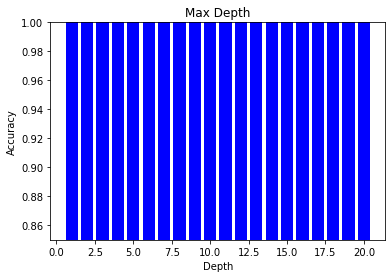

,trees,acc_test
0,1,0.940860
1,2,0.947491
2,3,0.947133
3,4,0.949104
4,5,0.950538
5,6,0.951254
6,7,0.950358
7,8,0.952151
8,9,0.949462
9,10,0.949642


In [ ]:
depth = res[['trees','acc_test']]
depth.to_excel("data/ResultadosRFtrees.xlsx",index = False, header = True)
x = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
y = []

for i in range(len(x)):
  y.append(depth.values[i][0])
plt.bar(x,y,color = 'blue')
plt.title('Max Depth')
plt.xlabel('Depth')
plt.ylabel('Accuracy')

plt.ylim(ymin=0.85,ymax=1)

plt.show()
depth

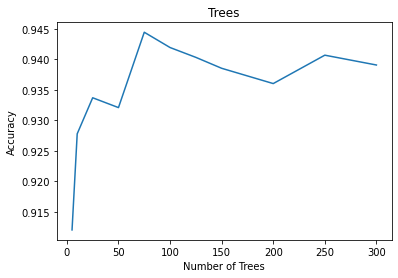

In [ ]:
trees = res[res.max_depth == 15].sort_values('trees')

t = trees[['trees']].values
a = trees[['acc_test']].values

x = []
y = []

for i in range(len(t)):
  x.append(t[i][0])
  y.append(a[i][0])

fig,ax = plt.subplots()

ax.plot(x,y)

plt.title('Trees')
plt.xlabel('Number of Trees')
plt.ylabel('Accuracy')

plt.show()

# **GaussianNB (Naive Bayes)**

In [ ]:
nb = GaussianNB()
nb.fit(X_train, y_train)
nb_preds = nb.predict(X_test)

print("Naive Bayes Accuracy: {:.4f}".format(accuracy_score(y_test, nb_preds)))
print("Naive Bayes Classification Report:")
print(classification_report(y_test, nb_preds, zero_division=0))

# **LogisticRegression**

In [ ]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
lr_preds = lr.predict(X_test)

print("Logistic Regression Accuracy: {:.4f}".format(accuracy_score(y_test, lr_preds)))
print("Logistic Regression Classification Report:")
print(classification_report(y_test, lr_preds, zero_division=0))

# **DecisionTree**

In [ ]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
print("Precision: {:.4}".format(precision_score(clf.predict(X_test), y_test)))
print("Recall: {:.4}".format(recall_score(clf.predict(X_test), y_test)))
print("f1_score: {:.4}".format(f1_score(clf.predict(X_test), y_test)))
print("Accuracy: {:.4}".format(accuracy_score(clf.predict(X_test), y_test)))

Precision: 1.0
Recall: 0.9112
f1_score: 0.9536
Accuracy: 0.9509


In [ ]:
plot_tree(clf)

In [ ]:
import graphviz
dot_data = export_graphviz(clf, out_file=None)
graph = graphviz.Source(dot_data)
graph.render("iris")
graph

'~/Escritorio/iris'

# **Bibliografia**

BIBLIOGRAFIA



* Gastos en Armamento:
* asd


Para quitar Nulls, usamos KNN:

*   https://towardsdatascience.com/whats-the-best-way-to-handle-nan-values-62d50f738fc
*   https://machinelearningmastery.com/knn-imputation-for-missing-values-in-machine-learning/






